# Uploading, Streaming, and Sampling Data

## Uploading small amounts of data into memory

In [1]:
with open("Colors.txt", 'r') as open_file:
    print('Colors.txt content:\n' + open_file.read())

Colors.txt content:
Color	Value
Red	1
Orange	2
Yellow	3
Green	4
Blue	5
Purple	6
Black	7
White	8


## Streaming large amounts of data into memory

In [2]:
with open("Colors.txt", 'r') as open_file:
    for observation in open_file:
        print('Reading Data: ' + observation, end="")

Reading Data: Color	Value
Reading Data: Red	1
Reading Data: Orange	2
Reading Data: Yellow	3
Reading Data: Green	4
Reading Data: Blue	5
Reading Data: Purple	6
Reading Data: Black	7
Reading Data: White	8

## Generating variations on image data

(100, 100, 3)
30000


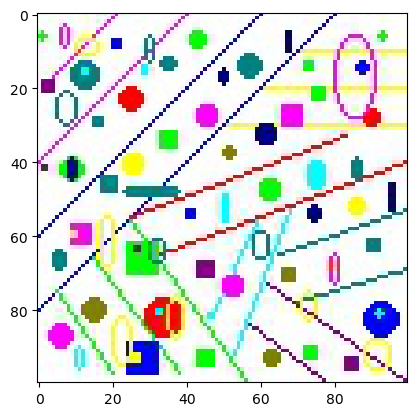

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

image = img.imread("Colorblk.jpg")
print(image.shape)
print(image.size)
plt.imshow(image)
plt.show()

## Sampling data in different ways

In [4]:
n = 2
with open("Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if j % n==0:
            print('Reading Line: ' + str(j) +
            ' Content: ' + observation, end="")

Reading Line: 0 Content: Color	Value
Reading Line: 2 Content: Orange	2
Reading Line: 4 Content: Green	4
Reading Line: 6 Content: Purple	6
Reading Line: 8 Content: White	8

This is the output with `n=3` rather than `n=2`.

In [5]:
n = 3
with open("Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if j % n==0:
            print('Reading Line: ' + str(j) +
            ' Content: ' + observation, end="")

Reading Line: 0 Content: Color	Value
Reading Line: 3 Content: Yellow	3
Reading Line: 6 Content: Purple	6


In [6]:
from random import random
sample_size = 0.25
with open("Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if random()<=sample_size:
            print('Reading Line: ' + str(j) +
            ' Content: ' + observation, end="")

Reading Line: 2 Content: Orange	2
Reading Line: 4 Content: Green	4


# Accessing Data in Structured Flat-File Form

## Reading from a text file

In [7]:
import pandas as pd
color_table = pd.io.parsers.read_table("Colors.txt")
print(color_table)

    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Purple      6
6   Black      7
7   White      8


## Reading CSV delimited format

In [8]:
import pandas as pd
titanic = pd.io.parsers.read_csv("Titanic.csv")
X = titanic[['age']]
print(X)

FileNotFoundError: [Errno 2] No such file or directory: 'Titanic.csv'

In [ ]:
X = titanic[['age']].values
print(X)

## Reading Excel and other Microsoft Office files

In [ ]:
# IF you receive an error when executing the code below,
# use this cell to install the required support.
!pip install xlrd

In [ ]:
import pandas as pd
xls = pd.ExcelFile("Values.xls")
trig_values = xls.parse('Sheet1', index_col=None,
                        na_values=['NA'])
print(trig_values)

# Sending Data in Unstructured File Form

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm

example_file = ("http://upload.wikimedia.org/" +
    "wikipedia/commons/7/7d/Dog_face.png")
image = imread(example_file, as_gray=True)
plt.imshow(image, cmap=cm.gray)
plt.show()

In [ ]:
print("data type: %s, shape: %s" %
      (type(image), image.shape))

In [ ]:
image2 = image[5:70,0:70]
plt.imshow(image2, cmap=cm.gray)
plt.show()

In [ ]:
image3 = resize(image2, (30, 30), mode='symmetric')
plt.imshow(image3, cmap=cm.gray)
print("data type: %s, shape: %s" %
      (type(image3), image3.shape))

In [ ]:
image_row = image3.flatten()
print("data type: %s, shape: %s" %
      (type(image_row), image_row.shape))

# Managing Data from Relational Databases

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')

# Accessing Data from the Web

In [ ]:
from lxml import objectify
import pandas as pd

xml = objectify.parse(open('XMLData.xml'))
root = xml.getroot()

df = pd.DataFrame(columns=('Number', 'String', 
                           'Boolean'))

for i in range(0,4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'String', 'Boolean'],
                   [obj[0].text, obj[1].text,
                    obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    row_s = row_s.to_frame().transpose()
    df = pd.concat([df, row_s])

print(df)